In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
np.random.seed(2304)

In [5]:
pd.set_option('display.max_rows', 500)

In [6]:
liver = pd.read_csv(r'indian_liver_patient.csv' )
liver



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [7]:
liver=liver.dropna()

#heart[heart.thalach=='?'] for finding values
      
#heart = heart.drop(['name', 'aliveat1', 'group'], axis=1)
print(liver.dtypes)
liver.shape


Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


(579, 11)

In [8]:
liver=liver.convert_objects(convert_numeric=True)
liver.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [62]:
ill = liver.ix[:, ['Total_Bilirubin']]
ill.shape

(579, 1)

In [63]:
print(ill.shape)
print(liver.shape)

(579, 1)
(579, 11)


In [64]:
ill = ill.values
ill

array([[ 0.7],
       [10.9],
       [ 7.3],
       [ 1. ],
       [ 3.9],
       [ 1.8],
       [ 0.9],
       [ 0.9],
       [ 0.9],
       [ 0.7],
       [ 0.6],
       [ 2.7],
       [ 0.9],
       [ 1.1],
       [ 0.7],
       [ 0.6],
       [ 1.8],
       [ 1.6],
       [ 0.9],
       [ 0.9],
       [ 2.2],
       [ 2.9],
       [ 6.8],
       [ 1.9],
       [ 0.9],
       [ 4.1],
       [ 4.1],
       [ 6.2],
       [ 1.1],
       [ 0.7],
       [ 4. ],
       [ 0.9],
       [ 1. ],
       [ 2.6],
       [ 2.6],
       [ 1.3],
       [ 0.7],
       [14.2],
       [ 1.4],
       [ 2.7],
       [ 2.4],
       [ 0.6],
       [ 6.8],
       [ 2.6],
       [ 1. ],
       [ 1.8],
       [ 3.9],
       [ 1.1],
       [ 0.6],
       [18.4],
       [ 0.7],
       [ 0.6],
       [ 3.1],
       [ 1.1],
       [ 8.9],
       [ 8.9],
       [ 0.8],
       [ 0.9],
       [ 0.8],
       [ 1.1],
       [ 0.8],
       [ 1. ],
       [ 1. ],
       [ 0.7],
       [ 1.3],
       [ 1.4],
       [ 2

In [65]:
ill = ill.reshape(579,)
ill.shape

(579,)

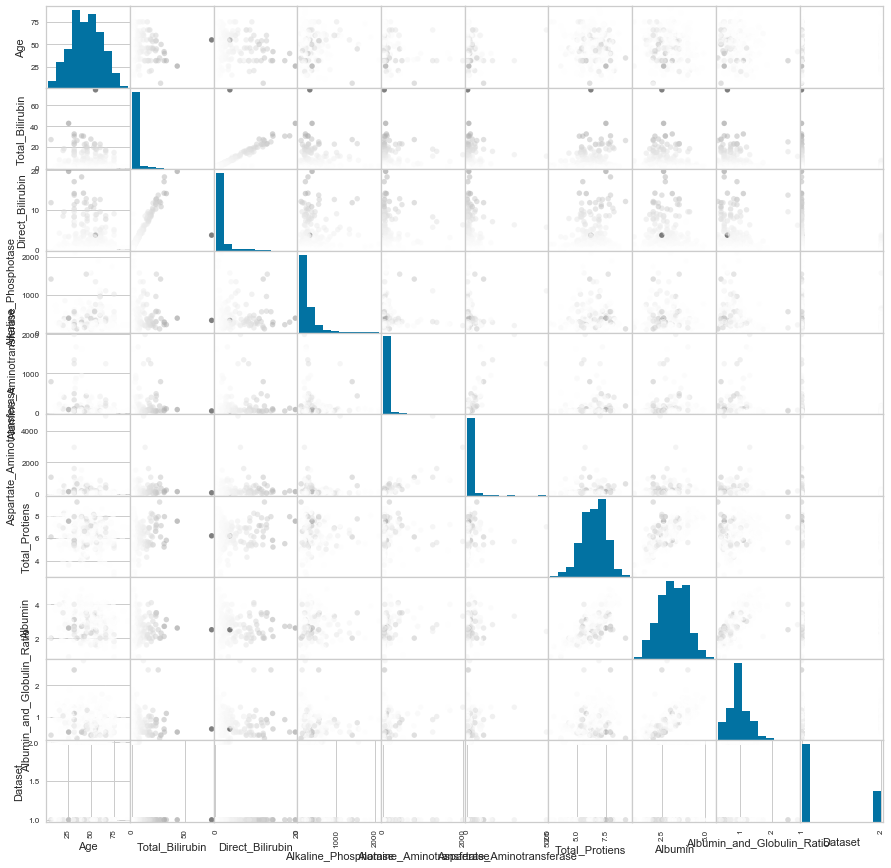

In [66]:
pd.plotting.scatter_matrix(liver, c=ill, figsize=(15,15), marker='o', s=30),
plt.show()

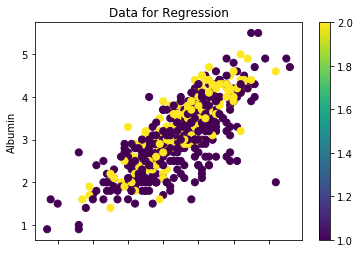

In [13]:
liver.plot.scatter(x='Total_Protiens', y='Albumin', c=ill, colormap='viridis', s=50, title='Data for Regression');
              

In [47]:
X = liver.ix[:, ['Total_Protein']]
y = liver.ix[:, ['Albumin']]

(579, 1)

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

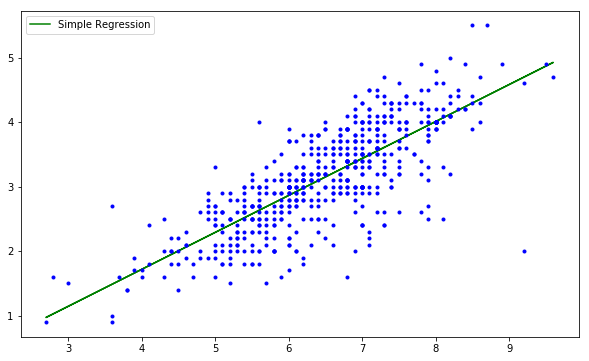

In [16]:
y_proba = reg.predict(X)

f = plt.figure(figsize=(10, 6))
plt.plot(X, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X, y, 'bo', markersize=3)
plt.legend(loc='best')

In [17]:
sample=reg.predict(5)
sample

array([[2.28864127]])

In [18]:
reg.score(X, y)

0.6132646709931266

In [19]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [53]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
ridge = Ridge()
visualizer = ResidualsPlot(Ridge, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()                # Draw/show/poof the data

TypeError: fit() missing 1 required positional argument: 'y'

In [54]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=2304, contamination=0.05)
clf.fit(X_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
y_pref_test

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
out = clf.predict(X_train)
out

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
X_in=X_train[clf.predict(X_train)==1]
y_in=y_train[clf.predict(X_train)==1]
X_out=X_train[clf.predict(X_train)==-1]
y_out=y_train[clf.predict(X_train)==-1]
y_in.shape

(438, 1)

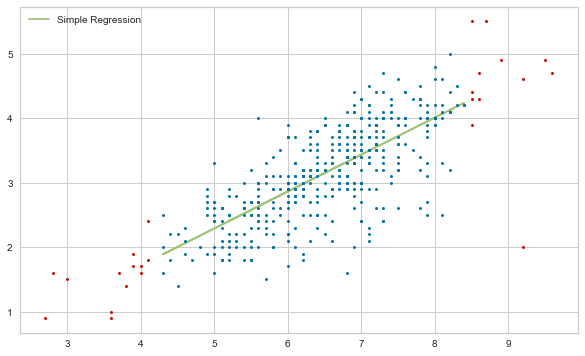

In [26]:
y_proba_in = reg.predict(X_in)

f = plt.figure(figsize=(10, 6))
plt.plot(X_in, y_proba_in[:, 0], "g-", label="Simple Regression")
plt.plot(X_in, y_in, 'bo', markersize=3)
plt.plot(X_out, y_out, 'ro', markersize=3)
plt.legend(loc='best')

In [27]:
from sklearn.covariance import EllipticEnvelope
elip = EllipticEnvelope(contamination=0.1)
elip.fit(X_train)
elip.predict(X_train)

array([ 1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [28]:
X_clean=X[elip.predict(X)==1]
y_clean=y[elip.predict(X)==1]
X_dirty=X[elip.predict(X)==-1]
y_dirty=y[elip.predict(X)==-1]
X_clean.shape

(519, 1)

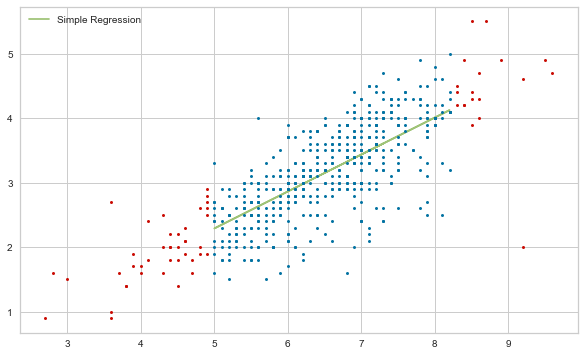

In [29]:
y_proba_clean = reg.predict(X_clean)

f = plt.figure(figsize=(10, 6))
plt.plot(X_clean, y_proba_clean[:, 0], "g-", label="Simple Regression")
plt.plot(X_clean, y_clean, 'bo', markersize=3)
plt.plot(X_dirty, y_dirty, 'ro', markersize=3)
plt.legend(loc='best')

In [30]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_in,y_in)
reg2.score(X_in, y_in)

0.5279615742247147

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_proba)

0.2436573658501719

In [32]:
mean_squared_error(y_in, y_proba_in)

0.23935048984701637

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
a = liver.ix[:, 0:9]
b = liver.ix[:, 9:10]
a


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,65,Female,0.7,0.1,187,16,18,6.8,3.3
1,62,Male,10.9,5.5,699,64,100,7.5,3.2
2,62,Male,7.3,4.1,490,60,68,7.0,3.3
3,58,Male,1.0,0.4,182,14,20,6.8,3.4
4,72,Male,3.9,2.0,195,27,59,7.3,2.4
5,46,Male,1.8,0.7,208,19,14,7.6,4.4
6,26,Female,0.9,0.2,154,16,12,7.0,3.5
7,29,Female,0.9,0.3,202,14,11,6.7,3.6
8,17,Male,0.9,0.3,202,22,19,7.4,4.1
9,55,Male,0.7,0.2,290,53,58,6.8,3.4


In [53]:
a=a.replace('Female', 0)
a=a.replace('Male', 1)
a

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,65,0,0.7,0.1,187,16,18,6.8,3.3
1,62,1,10.9,5.5,699,64,100,7.5,3.2
2,62,1,7.3,4.1,490,60,68,7.0,3.3
3,58,1,1.0,0.4,182,14,20,6.8,3.4
4,72,1,3.9,2.0,195,27,59,7.3,2.4
5,46,1,1.8,0.7,208,19,14,7.6,4.4
6,26,0,0.9,0.2,154,16,12,7.0,3.5
7,29,0,0.9,0.3,202,14,11,6.7,3.6
8,17,1,0.9,0.3,202,22,19,7.4,4.1
9,55,1,0.7,0.2,290,53,58,6.8,3.4


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, random_state=42)


In [59]:
#from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_features=2, n_informative=2, random_state=2304, shuffle=False)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
importances=regr.feature_importances_
y_pred_all=regr.predict(X_test)
regr.score(X_test, y_test)

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7272716719005432

In [38]:
y_pred=regr.predict(X_test)
a

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,65,0,0.7,0.1,187,16,18,6.8,3.3
1,62,1,10.9,5.5,699,64,100,7.5,3.2
2,62,1,7.3,4.1,490,60,68,7.0,3.3
3,58,1,1.0,0.4,182,14,20,6.8,3.4
4,72,1,3.9,2.0,195,27,59,7.3,2.4
5,46,1,1.8,0.7,208,19,14,7.6,4.4
6,26,0,0.9,0.2,154,16,12,7.0,3.5
7,29,0,0.9,0.3,202,14,11,6.7,3.6
8,17,1,0.9,0.3,202,22,19,7.4,4.1
9,55,1,0.7,0.2,290,53,58,6.8,3.4


In [61]:
regr.score(X_test, y_test)

0.7272716719005432

In [62]:
a2 = liver.ix[:, ['Total_Bilirubin', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin']]

In [63]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(a2, b, random_state=42)
regr5 = RandomForestRegressor()
regr5.fit(X_train_5, y_train_5)
importances=regr5.feature_importances_
regr5.score(X_test_5, y_test_5)

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7584427985978079

YellowbrickValueError: y must be a (1,) dimensional array not (145, 1)

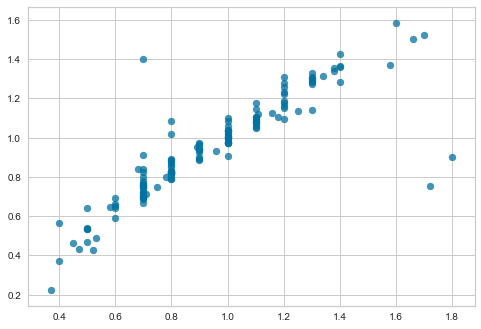

In [64]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
lasso = Lasso()
ridge = Ridge()
visualizer = PredictionError(ridge)

visualizer.fit(X_train_5, y_train_5)  # Fit the training data to the visualizer
visualizer.score(X_test_5, y_test_5)  # Evaluate the model on the test data
g = visualizer.poof()     

In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.742764882841686

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.02177866896551724

In [76]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm=svm_reg.predict(X_test)
print(svm_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_svm)

0.05327017144150625


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08015435747548719

In [77]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
y_pred_sgd=sgd_reg.predict(X_test)
print(sgd_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_sgd)

-1.0982758722971517e+29


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9.29849194768129e+27

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn=knn_reg.predict(X_test)
print(knn_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_knn)

0.048281865319903194


0.08057668965517241

In [79]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X_train, y_train)
y_pred_gau=gau_reg.predict(X_test)
print(gau_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_gau)

-10.09579967676969


0.9394197446196159

In [71]:
gau_reg.score(X_test, y_test)

-10.09579967676969

In [82]:
'''this seems way to good '''

'this seems way to good '

In [84]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)
y_pred_mlp=mlp_reg.predict(X_test)
print(mlp_reg.score(X_test, y_test))
mean_squared_error(y_test, y_pred_mlp)

-674.9022702150451


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


57.224891992470646

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
bootstrap = [True, False]
criterion = ['mse', 'mae']

random_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap, 'criterion': criterion}

print(random_grid)

{'n_estimators': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']}


In [87]:
#from sklearn.model_selection import RandomizedSearchCV
#grid = GridSearchCV(estimator=regr, param_grid=random_grid, scoring='neg_mean_squared_error')
#grid.fit(X_train, y_train)

In [88]:
#grid.best_estimator_

In [89]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.019504463734551093

In [90]:
X3 = heart.ix[:, ['age']]
y3 = heart.ix[:, ['thalach']]
print(X3.shape)
print(y3.shape)

NameError: name 'heart' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=2304)

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

#Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False, train_color='y', test_color='black')
visualizer.fit(X3_train, y3_train)  # Fit the training data to the model
visualizer.score(X3_test, y3_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [ ]:
visualizer = ResidualsPlot(svm_reg, hist=False, train_color='y', test_color='black')
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [ ]:
visualizer = ResidualsPlot(regr, hist=False, train_color='y', test_color='black')
B=visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [ ]:
X_train.shape

In [ ]:
B

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [ ]:
X2 = heart.ix[:, ['age', 'thalach']]
y2 = heart.ix[:, 8:]
print(X2.shape)
print(y2.shape)

In [ ]:
X2 = X2.values
y2 = y2.values
y2.shape

In [ ]:
y2 = y2.reshape(261,)
y2.shape
#X2.shape

In [ ]:
X=X2
y=y2

In [ ]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.brg)
    
    # Add the training instances to the plot
    
    markers = ['o', 'x']
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    edgecolor='black', 
                    marker = markers[idx],
                    label=cl)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

    plt.text(x0_min+2, x0_min+2, "Not Iris-Virginica", fontsize=12, color="b", ha="center")
    plt.text(x1_max+3, x1_max-2, "Iris-Virginica", fontsize=12, color="g", ha="center")

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X2,y2)
plot_decision_regions(X2, y2, softmax_reg)


In [ ]:
regr2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr2.fit(X2, y2)
#y_pred=regr.predict(X_test)
#mean_squared_error(y_test, y_pred)

In [ ]:
plot_decision_regions(X2, y2, regr2)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X2, y2)
plot_decision_regions(X2, y2, gau_reg)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X2, y2)
plot_decision_regions(X2, y2, knn_reg)

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(a, b, random_state=2304)